# Lab One

Business Understanding:

The data was collected as a comprehensive repository of Formula 1 data, capturing race results, driver and constructor standings, lap times, pit stop details, circuit information, etc. It serves as a valuable resource for Teams, researchers, and fans to study the evolution of the sport, understand performance trends, and uncover factors that contribute to success in Formula 1.
 
By analyzing this historical data, we can identify trends, patterns, and correlations that provide predictive insights. For instance, we can explore whether specific driver characteristics contribute to their likelihood of winning races or becoming season champions. Additionally, we can measure the impact of pit stop times and frequency on a driver's chances of finishing on the podium. 

To ensure the accuracy and completeness of the dataset, data validation processes are crucial. Data validation processes can include cross-referencing with official Formula 1 records, comparing results across multiple sources, and performing data quality checks to identify and correct any inconsistencies or missing information.

The effectiveness of prediction algorithms can be assessed by measuring their accuracy in predicting race outcomes, driver standings, and lap times. By comparing the algorithm's predictions to actual results, we can gauge its performance in these specific areas.

Data Understanding:
    
Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file
    
  There are three datasets focusing on the Drivers. The first dataset provides basic information such as names, dates of birth, and nationalities. The second dataset, Driver Standings, tracks the drivers' positions and points in the competition for each race of every season. The last dataset, Driver Results, contains attributes related to a driver's race performance, including points, positions, fastest lap times, the constructor they raced for, starting grid positions, etc.
    
  The Pitstop dataset records details of each driver's pitstop, including the time it took. The Qualifying dataset shows where each driver qualified on the grid for each race, as well as a breakdown of their times for each qualifying session. 

  Smaller tables such as the Status dataset explains the meaning behind each Status ID, which is included in other datasets such as Driver Results. The Status ID represents various incidents that can occur during a race and impact performance.



In [3]:
# general
import os
import numpy as np
import pandas as pd

# plots
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from IPython.display import Image

# predictions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

In [4]:
drivers = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/drivers.csv")
driver_standings = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/driver_standings.csv", sep = ",")
driver_results = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/results.csv")
lap_times = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/lap_times.csv")
pit_stops = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/pit_stops.csv")
qualifying = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/qualifying.csv")
races = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/races.csv")
sprint_results = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/sprint_results.csv")
status = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/status.csv")
constructors = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/constructors.csv")
constructor_standings = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/constructor_standings.csv")
constructor_results = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/constructor_results.csv")
circuits = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/circuits.csv")

In [5]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [6]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33902 entries, 0 to 33901
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   positionText       33902 non-null  object 
 6   wins               33902 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [7]:
driver_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [8]:
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538121 entries, 0 to 538120
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        538121 non-null  int64 
 1   driverId      538121 non-null  int64 
 2   lap           538121 non-null  int64 
 3   position      538121 non-null  int64 
 4   time          538121 non-null  object
 5   milliseconds  538121 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.6+ MB


In [9]:
pit_stops.info()
pit_stops.milliseconds.mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9634 non-null   int64 
 1   driverId      9634 non-null   int64 
 2   stop          9634 non-null   int64 
 3   lap           9634 non-null   int64 
 4   time          9634 non-null   object
 5   duration      9634 non-null   object
 6   milliseconds  9634 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 527.0+ KB


72401.7306414781

In [10]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9575 non-null   int64 
 1   raceId         9575 non-null   int64 
 2   driverId       9575 non-null   int64 
 3   constructorId  9575 non-null   int64 
 4   number         9575 non-null   int64 
 5   position       9575 non-null   int64 
 6   q1             9567 non-null   object
 7   q2             9424 non-null   object
 8   q3             9276 non-null   object
dtypes: int64(6), object(3)
memory usage: 673.4+ KB


In [11]:
races.info()
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB
<class 'pandas.core.

In [12]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [13]:
#constructors.head()
constructor_standings.head()
#constructor_standings.info()
#constructor_results.head()
#constructor_results.info()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


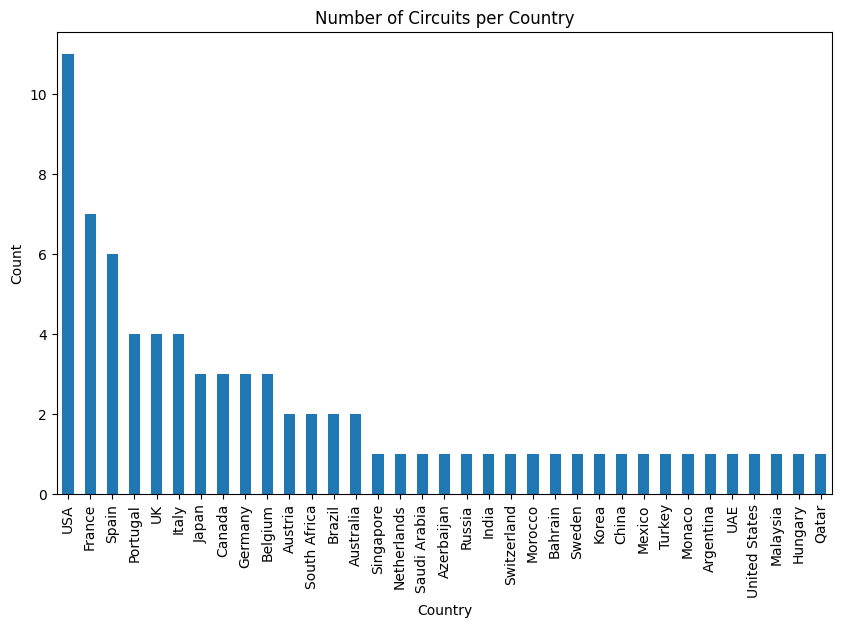

In [14]:

country_counts = circuits['country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Circuits per Country')
plt.show()

In [19]:
# Merge drivers and driver_standings based on driver.id
driver_1 = pd.merge(drivers, driver_standings, on='driverId', how='outer')

In [21]:
driver_1.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,driverStandingsId,raceId,points,position,positionText,wins
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,18.0,10.0,1.0,1,1.0
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9.0,19.0,14.0,1.0,1,1.0
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27.0,20.0,14.0,3.0,3,1.0
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48.0,21.0,20.0,2.0,2,1.0
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69.0,22.0,28.0,3.0,3,1.0


In [20]:
driver_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33909 entries, 0 to 33908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverId           33909 non-null  int64  
 1   driverRef          33909 non-null  object 
 2   number             33909 non-null  object 
 3   code               33909 non-null  object 
 4   forename           33909 non-null  object 
 5   surname            33909 non-null  object 
 6   dob                33909 non-null  object 
 7   nationality        33909 non-null  object 
 8   url                33909 non-null  object 
 9   driverStandingsId  33902 non-null  float64
 10  raceId             33902 non-null  float64
 11  points             33902 non-null  float64
 12  position           33902 non-null  float64
 13  positionText       33902 non-null  object 
 14  wins               33902 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 3.9+ MB


In [22]:
drivers_2 = pd.merge(driver_1, driver_results, on='driverId', how='outer')

In [23]:
drivers_2.head()

,driverId,driverRef,number_x,code,forename,surname,dob,nationality,url,driverStandingsId,...,positionOrder,points_y,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1.0
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,5.0,4.0,56.0,+46.548,5525103,53,3,1:35.462,209.033,1.0
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,13.0,0.0,56.0,\N,\N,25,19,1:35.520,203.969,11.0
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,3.0,6.0,66.0,+4.187,5903238,20,3,1:22.017,204.323,1.0
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,2.0,8.0,58.0,+3.779,5213230,31,2,1:26.529,222.085,1.0


In [24]:
drivers_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475819 entries, 0 to 3475818
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   driverId           int64  
 1   driverRef          object 
 2   number_x           object 
 3   code               object 
 4   forename           object 
 5   surname            object 
 6   dob                object 
 7   nationality        object 
 8   url                object 
 9   driverStandingsId  float64
 10  raceId_x           float64
 11  points_x           float64
 12  position_x         float64
 13  positionText_x     object 
 14  wins               float64
 15  resultId           float64
 16  raceId_y           float64
 17  constructorId      float64
 18  number_y           object 
 19  grid               float64
 20  position_y         object 
 21  positionText_y     object 
 22  positionOrder      float64
 23  points_y           float64
 24  laps               float64
 25  time              

In [33]:
#Renaming Duplicate Columns
drivers_2 = drivers_2.rename(columns={'number_x':'number'})
drivers_2 = drivers_2.rename(columns={'raceId_x':'raceId'})
drivers_2 = drivers_2.rename(columns={'points_x':'points'})
drivers_2 = drivers_2.rename(columns={'position_x':'position'})
drivers_2 = drivers_2.rename(columns={'positionText_x':'positionText'})

In [26]:
#Remove Duplicate Columns
drivers_2 = drivers_2.drop(['raceId_y', 'number_y','position_y','positionText_y','points_y'], axis=1)

In [34]:
drivers_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475819 entries, 0 to 3475818
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   driverId           int64  
 1   driverRef          object 
 2   number             object 
 3   code               object 
 4   forename           object 
 5   surname            object 
 6   dob                object 
 7   nationality        object 
 8   url                object 
 9   driverStandingsId  float64
 10  raceId             float64
 11  points             float64
 12  position           float64
 13  positionText       object 
 14  wins               float64
 15  resultId           float64
 16  constructorId      float64
 17  grid               float64
 18  positionOrder      float64
 19  laps               float64
 20  time               object 
 21  milliseconds       object 
 22  fastestLap         object 
 23  rank               object 
 24  fastestLapTime     object 
 25  fastestLapSpeed   

In [37]:
#Top 10 Drivers with the most wins per season

SortedByWins = drivers_2.sort_values(by='wins', ascending=False)
Top10Drivers = SortedByWins.head(10)
result = Top10Drivers[['driverId','forename', 'surname', 'wins', 'nationality']]
result = result.drop_duplicates(subset='driverId')
print(result)


#ISSUE - only pulling in Max, not sure which step to filter only unique values. Will come back to this.

         driverId forename     surname  wins nationality
3370927       830      Max  Verstappen  15.0       Dutch


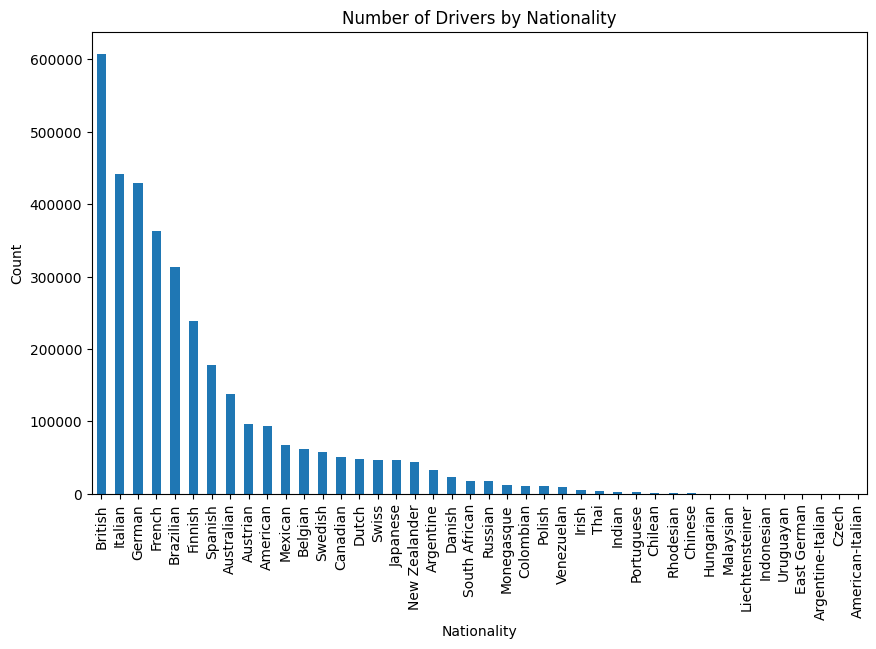

In [38]:
#Nationalities of F1 drivers

nationality_counts = drivers_2['nationality'].value_counts()
plt.figure(figsize=(10, 6))
nationality_counts.plot(kind='bar')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Number of Drivers by Nationality')
plt.show()



In [39]:
#Combine Race and Pitstop Dataset to see average time of Pitstops in the years 2011-2020

race_1 = pd.merge(races, pit_stops, on='raceId', how='outer')

In [40]:
race_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   raceId        10497 non-null  int64  
 1   year          10497 non-null  int64  
 2   round         10497 non-null  int64  
 3   circuitId     10497 non-null  int64  
 4   name          10497 non-null  object 
 5   date          10497 non-null  object 
 6   time_x        10497 non-null  object 
 7   url           10497 non-null  object 
 8   fp1_date      10497 non-null  object 
 9   fp1_time      10497 non-null  object 
 10  fp2_date      10497 non-null  object 
 11  fp2_time      10497 non-null  object 
 12  fp3_date      10497 non-null  object 
 13  fp3_time      10497 non-null  object 
 14  quali_date    10497 non-null  object 
 15  quali_time    10497 non-null  object 
 16  sprint_date   10497 non-null  object 
 17  sprint_time   10497 non-null  object 
 18  driverId      9634 non-nul

In [42]:
race_1 = race_1.rename(columns={'time_y':'TimeOfPitStop'})

In [44]:
#Filtering Race seasons 2011 - 2020

race_2011_2020 = race_1.loc[(race_1['year'] >= 2011) & (race_1['year'] <= 2020)]
race_2011_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8031 entries, 839 to 8869
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   raceId         8031 non-null   int64  
 1   year           8031 non-null   int64  
 2   round          8031 non-null   int64  
 3   circuitId      8031 non-null   int64  
 4   name           8031 non-null   object 
 5   date           8031 non-null   object 
 6   time_x         8031 non-null   object 
 7   url            8031 non-null   object 
 8   fp1_date       8031 non-null   object 
 9   fp1_time       8031 non-null   object 
 10  fp2_date       8031 non-null   object 
 11  fp2_time       8031 non-null   object 
 12  fp3_date       8031 non-null   object 
 13  fp3_time       8031 non-null   object 
 14  quali_date     8031 non-null   object 
 15  quali_time     8031 non-null   object 
 16  sprint_date    8031 non-null   object 
 17  sprint_time    8031 non-null   object 
 18  driverId   

In [49]:
duration_summary = race_2011_2020['duration'].describe()
print(duration_summary)

count       8031
unique      5819
top       22.745
freq           6
Name: duration, dtype: object


In [50]:
duration_highest = race_2011_2020['duration'].max()
print(duration_highest)

59.555


In [51]:
duration_lowest = race_2011_2020['duration'].min()
print(duration_lowest)

12.897
